# Importing the Data and The Libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import decomposition
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from sklearn.decomposition import TruncatedSVD, FastICA, NMF, FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV


from sklearn.manifold import TSNE

from sklearn.decomposition import KernelPCA, PCA

df_train = pd.read_csv("ProcessedWeatherData.csv")
df_test = pd.read_csv("ProcessedWeatherDataTest.csv")

In [2]:
df_train.head()
df_train.drop(["station_id"],inplace = True, axis = 1)
df_test.drop(["station_id"],inplace = True, axis = 1)

df_train.head()



,AtmosphericPressure,WindDirection,WindSpeed,Gust,WaveHeight,WavePeriod,AirTemperature,SeaTemperature,RelativeHumidity
0,1015.8,20.000000,18.000000,33.000000,4.5,8.0,7.0,11.4,65.0
1,1006.2,195.839417,16.959986,24.214069,2.2,5.0,5.3,10.6,78.0
2,1011.2,10.000000,12.000000,20.000000,3.2,7.0,4.7,10.2,78.0
3,1009.4,30.000000,17.000000,25.000000,2.9,7.0,5.7,10.4,61.0
4,1009.0,20.000000,18.000000,25.000000,2.9,6.0,5.3,10.4,67.0


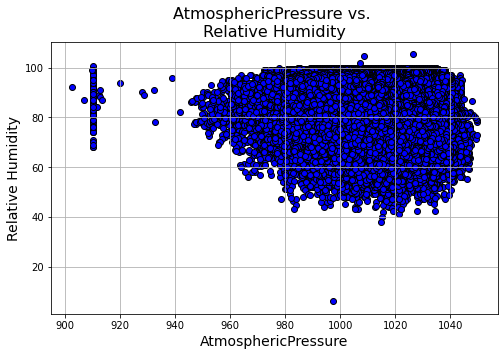

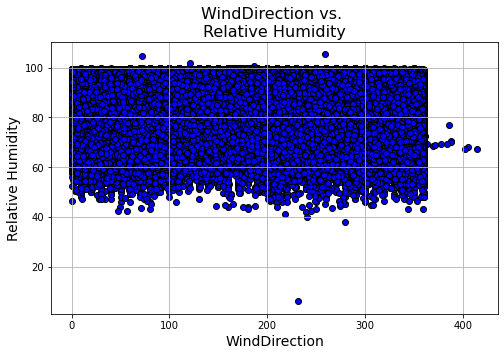

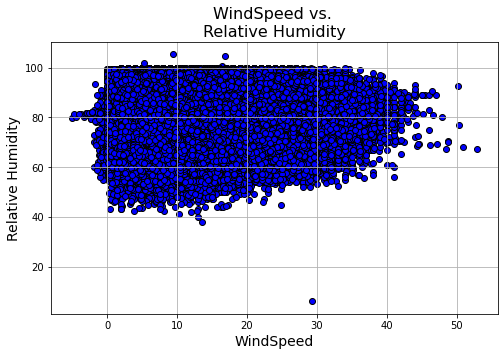

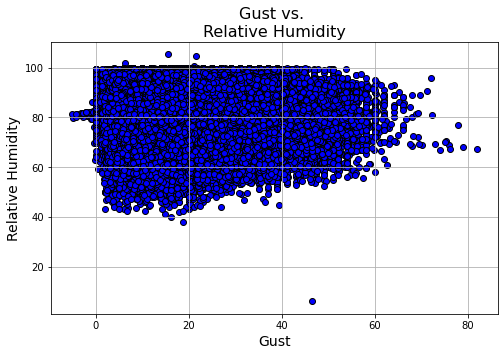

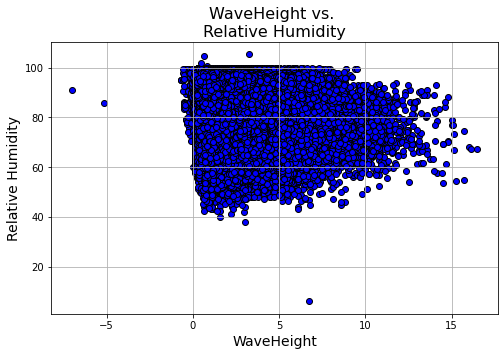

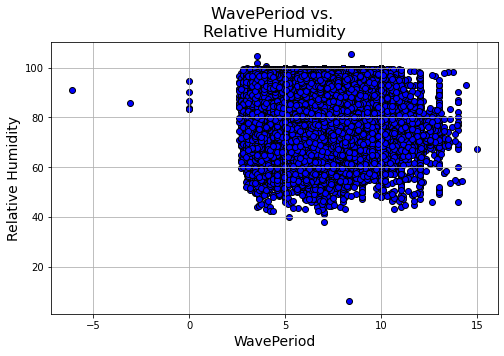

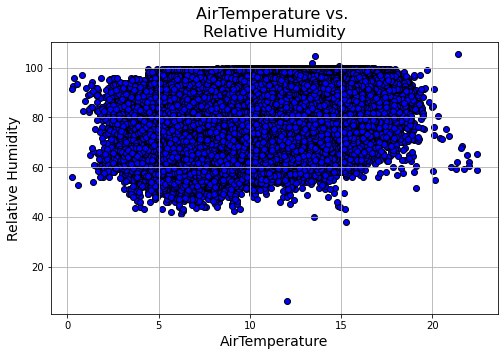

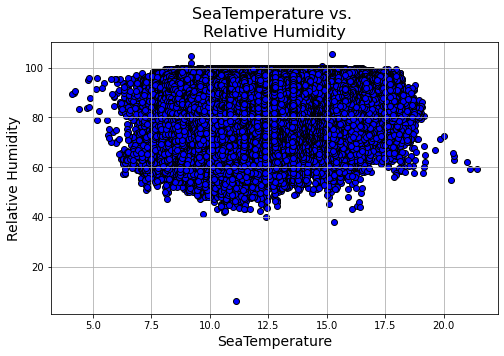

In [3]:
for c in df_train.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nRelative Humidity".format(c),fontsize=16)
    plt.scatter(x=df_train[c],y=df_train['RelativeHumidity'],color='blue',edgecolor='k')
    plt.grid(True)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Relative Humidity',fontsize=14)
    plt.show()

In [ ]:
df_train = df_train[["AtmosphericPressure","WindDirection","AirTemperature","SeaTemperature"]]
df_test = df_test[["AtmosphericPressure","WindDirection","AirTemperature","SeaTemperature"]]


## Dropping all the libraires and selecting only rows that start after the 2010

# Selecting only the top 2 most correlated with the Dependent Variable

In [ ]:
# # df_vis['RelativeHumidity_labels'] = df_vis['RelativeHumidity'].apply(lambda value:'low' 
# #                                                                       if value <= 70 else 'medium'
# #                                                                               if value < 90 else 'high')

# # from sklearn.preprocessing import OrdinalEncoder

# # ord_enc = OrdinalEncoder()

# # df_vis['RelativeHumidity_labels'] = ord_enc.fit_transform(np.reshape(df_vis['RelativeHumidity_labels'].values, (1,-1) ))

# # df_vis['RelativeHumidity_labels'] = pd.Categorical(df_vis['RelativeHumidity_labels'], 
# #                                            categories=['low', 'medium', 'high'])

# # df_vis.head()



# fig_dims = (12,8)
# fig, ax = plt.subplots(figsize = fig_dims)
# sns.heatmap(df_train.corr(), ax = ax)
# plt.show()


# df_train.corr()
# df_train.var()

In [ ]:
# df_var = df_train.describe().T
# df_var  = df_var.reset_index().rename(columns = {'index' : 'columns'})

# df_var['column_var'] = df_var['columns'].apply(lambda x : np.var(df_train[x]))
# df_var['target_corr'] = df_var['columns'].apply(lambda x : np.corrcoef(df_train['RelativeHumidity'], df_train[x])[0][1])


# df_var = df_var.sort_values('column_var', ascending = True)
# df_var['column_var'] = (df_var['column_var'] - df_var['column_var'].min()) / (df_var['column_var'].max() - df_var['column_var'].min())
# trace1 = go.Scatter(x=df_var['columns'], y=df_var['column_var'], opacity=0.75, marker=dict(color="red"))
# layout = dict(height=400, title='Feature Variance', legend=dict(orientation="h"));
# fig = go.Figure(data=[trace1], layout=layout);
# iplot(fig);

# df_var

# trace1 = go.Histogram(x=df_var['target_corr'], opacity=0.45, marker=dict(color="green"))
# layout = dict(height=400, title='Distribution of correlation with target', legend=dict(orientation="h"));
# fig = go.Figure(data=[trace1], layout=layout);
# iplot(fig);

In [ ]:
X_train1 = df_train.iloc[:,: -1].values
y_train1 = df_train.iloc[:, -1].values
X_test1 = df_test.iloc[:, :-1].values
y_test1 = df_test.iloc[:, -1].values
print(X_train1.shape)

class CustomScaler():
    
        def __init__(self, X_Scale, y_Scale ) :
        
            self.X_Scale =   X_Scale 
            self.y_Scale =   y_Scale
            
            self.x_num =     [np.mean(self.X_Scale[:,i]) for i in range(self.X_Scale.shape[1])]
            self.x_maxs =    [np.max(self.X_Scale[:,i]) for i in range(self.X_Scale.shape[1])]
            self.x_mins =    [np.min(self.X_Scale[:,i]) for i in range(self.X_Scale.shape[1])]
            
            self.y_num =     np.mean(self.y_Scale)
            self.y_max_min = np.max(self.y_Scale) - np.min(self.y_Scale)

        def scaleX(self, x_value):
            x = x_value.copy()
            for i in range(x.shape[1]):
                
                x[:,i]= (x[:,i] - self.x_num[i])/(self.x_maxs[i]-self.x_mins[i])
            return x

        def inverseScaleX(self, x_value):
            x = x_value.copy()
            
            for i in range(x.shape[1]):
                x[:,i]= (x[:,i] * (self.x_maxs[i]-self.x_mins[i])) + self.x_num[i]
            return x



        

        def scaleY(self, y_value):
            y = y_value.copy()
            ys = (y - self.y_num)/(self.y_max_min)
            return ys

        def inverseScaleY(self, y_value):
            y = y_value.copy()
            ys = (y * self.y_max_min) + self.y_num
            return ys


        



custom_scaler = CustomScaler(X_train1,y_train1)
    
X_train = custom_scaler.scaleX(X_train1.copy())
y_train = custom_scaler.scaleY(y_train1.copy())
transform = None


print(X_train[-70000: -1])

print(X_test1[:10,:],y_test1[:10])



In [ ]:
transformer = None


In [ ]:

# # transformer = KernelPCA(0.95, kernel='linear').fit(X_train)
# transformer = PCA(0.95).fit(X_train)
# # transformer = decomposition.TruncatedSVD(n_components=7, algorithm='arpack').fit(X_train)

# # X_train = transformer.transform(X_train)
# # print(X_train)

# # transformer = TruncatedSVD(6).fit(X_train)
# # X_train = transformer.transform(X_train)
# # X_train

# # transformer = FastICA(6).fit(X_train)
# # X_train = transformer.transform(X_train)
# # X_train



# # This is not working for some reason needs to be fixed 
# # transformer = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(np.asarray(X_train).astype(float),y_train)
# X_train = transformer.transform(X_train)


In [ ]:

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.feature_selection import SelectFromModel

# clf = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)

# clf.fit(X_train, y_train)

# x_columns = df_train.columns[0:-1]

# for feature in zip(x_columns, clf.feature_importances_):
#     print(feature)
    
# sfm = SelectFromModel(clf, threshold=0.15)

# # Train the selector
# sfm.fit(X_train, y_train)

# for feature_list_index in sfm.get_support(indices=True):
#     print(x_columns[feature_list_index])

In [ ]:
X_train.shape

In [ ]:

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
    beta_2=0.99,
    epsilon=1e-07,
    amsgrad=False,)

def build_model(optimizer="adam", activation = 'relu'):    
    model = keras.Sequential()
    model.add(Dense(10 ,activation = activation,input_dim = X_train.shape[1], name = "layer1"))
    model.add(Dense(20, activation = activation, name = "layer2"))
    model.add(Dense(10 ,activation = activation, name = "layer3"))
    model.add(Dense(10 ,activation = activation, name = "layer4"))

   
    model.add(Dense(1, activation = 'relu', name = "layer7"))
    model.compile(loss="mean_squared_error", optimizer=opt)
    return model

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

regression_model = KerasRegressor(build_fn=build_model, epochs=500, batch_size=1024, verbose=1,callbacks=[es])
history=regression_model.fit(X_train, y_train)

# from sklearn.model_selection import cross_val_score
# regressor = KerasRegressor(build_fn = build_model)
# accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train,scoring='r2',cv = 5, n_jobs = 1)
# mean = accuracies.mean()
# variance = accuracies.std()



In [ ]:
# define the grid search parameters
# param_grid = {              
#               'batch_size':[1024],
#               'epochs' :              [1000],
#               'optimizer' :           ['Adam', 'sgd','RMSprop','Adamax'],
#               'dropout_rate' :        [0.5],
#               'activation' :          ['relu', 'sigmoid']
#              }

# gs = GridSearchCV(
#         estimator=regressor,
#         param_grid=param_grid, 
#         cv=5, 
#         verbose=2
#     )
    
# fitted_model = gs.fit(X_train,y_train)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
transformer = None
if transformer:
    y_pred = regression_model.predict(transformer.transform(custom_scaler.scaleX(np.asarray(X_test1).astype('float32'))))
else :
    y_pred = regression_model.predict((custom_scaler.scaleX(np.asarray(X_test1).astype('float32'))))

# y_pred = max_min*y_pred + y_min
print(mean_squared_error(custom_scaler.inverseScaleY(y_pred), y_test1))
y_test1

In [ ]:
np.column_stack((y_test1,custom_scaler.inverseScaleY(y_pred)))

In [ ]:
preds = pd.DataFrame({"preds":custom_scaler.inverseScaleY(y_pred), "true":y_test1})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residual plot in Ridge Regression")

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
print(r2_score(custom_scaler.inverseScaleY(y_pred), y_test1))
print(mean_absolute_error(custom_scaler.inverseScaleY(y_pred), y_test1))
